In [2]:
import pandas as pd

df = pd.read_csv("dirty_cafe_sales.csv")

df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [3]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [4]:
#Replace invalid values
import numpy as np

df.replace(["ERROR", "UNKNOWN", ""], np.nan, inplace=True)

In [5]:
# Convert numeric columns
num_cols = ["quantity", "price_per_unit", "total_spent"]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [6]:
#Convert date column
df["transaction_date"] = pd.to_datetime(
    df["transaction_date"],
    errors="coerce"
)

In [7]:
df_clean = df.dropna(
    subset= ["transaction_date", "item", "quantity", "price_per_unit"]
)

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7773 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    7773 non-null   object        
 1   item              7773 non-null   object        
 2   quantity          7773 non-null   float64       
 3   price_per_unit    7773 non-null   float64       
 4   total_spent       7382 non-null   float64       
 5   payment_method    5319 non-null   object        
 6   location          4679 non-null   object        
 7   transaction_date  7773 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 546.5+ KB


In [9]:
# Exploratory Data Analysis

In [10]:
#Revenue by item

In [11]:
item_revenue = (
    df_clean
     .groupby("item")["total_spent"]
     .sum()
     .sort_values(ascending=False)
)
item_revenue

item
Salad       14195.0
Sandwich    10992.0
Smoothie    10888.0
Juice        8631.0
Cake         8577.0
Coffee       5936.0
Tea          3976.5
Cookie       2630.0
Name: total_spent, dtype: float64

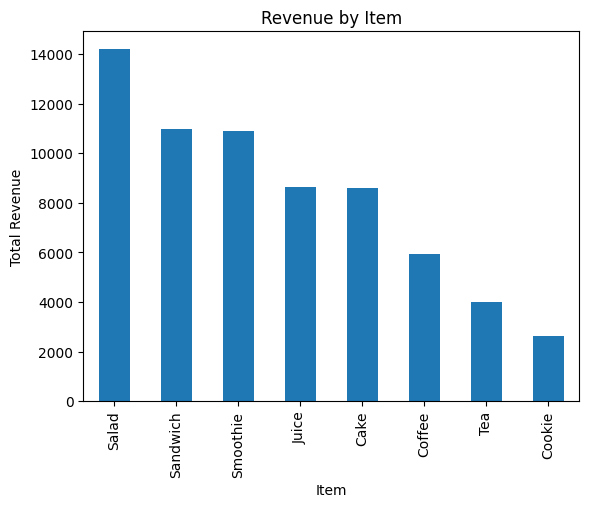

In [12]:
# Plot
import matplotlib.pyplot as plt

plt.figure()
item_revenue.plot(kind="bar")
plt.title("Revenue by Item")
plt.xlabel("Item")
plt.ylabel("Total Revenue")
plt.show()

In [14]:
# Time Series Analysis

In [13]:
daily_sales = (
    df_clean
    .groupby("transaction_date")["total_spent"]
    .sum()
)

In [14]:
daily_sales

transaction_date
2023-01-01    115.5
2023-01-02    114.5
2023-01-03    125.0
2023-01-04    223.5
2023-01-05    285.0
              ...  
2023-12-27    163.0
2023-12-28    161.0
2023-12-29     93.5
2023-12-30    115.0
2023-12-31    106.0
Name: total_spent, Length: 365, dtype: float64

In [15]:
# Plot

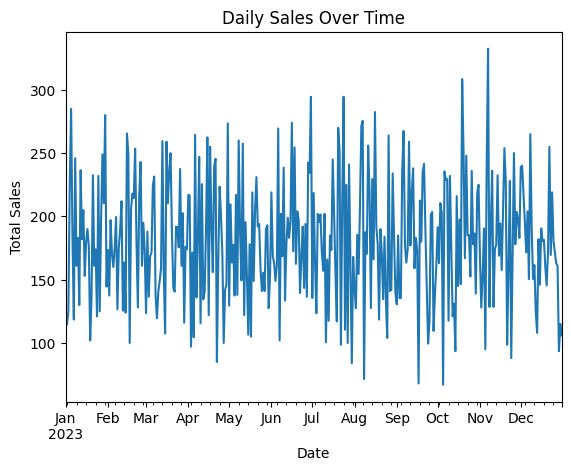

In [16]:
plt.figure()
daily_sales.plot()
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [17]:
# Monthly sales

In [18]:
monthly_sales = (
    df_clean
    .set_index("transaction_date")
    .resample("M")["total_spent"]
    .sum()
)

C:\Users\ishan\AppData\Local\Temp\ipykernel_46844\575833252.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["total_spent"]


In [19]:
monthly_sales

transaction_date
2023-01-31    5573.5
2023-02-28    5131.5
2023-03-31    5525.0
2023-04-30    5420.5
2023-05-31    5338.5
2023-06-30    5741.5
2023-07-31    5451.5
2023-08-31    5587.5
2023-09-30    5314.5
2023-10-31    5783.5
2023-11-30    5545.5
2023-12-31    5412.5
Freq: ME, Name: total_spent, dtype: float64